In [1]:
import pandas as pd
import numpy as np
import platform
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False})

#### 전체 데이터 불러오기

In [2]:
# 데이터 합치기
glob('./data/coffee/소상공인시장진흥공단_상가(상권)정보*.csv')

['./data/coffee\\소상공인시장진흥공단_상가(상권)정보_강원_202009.csv',
 './data/coffee\\소상공인시장진흥공단_상가(상권)정보_경기_202009.csv',
 './data/coffee\\소상공인시장진흥공단_상가(상권)정보_경남_202009.csv',
 './data/coffee\\소상공인시장진흥공단_상가(상권)정보_경북_202009.csv',
 './data/coffee\\소상공인시장진흥공단_상가(상권)정보_광주_202009.csv',
 './data/coffee\\소상공인시장진흥공단_상가(상권)정보_대구_202009.csv',
 './data/coffee\\소상공인시장진흥공단_상가(상권)정보_대전_202009.csv',
 './data/coffee\\소상공인시장진흥공단_상가(상권)정보_부산_202009.csv',
 './data/coffee\\소상공인시장진흥공단_상가(상권)정보_서울_202009.csv',
 './data/coffee\\소상공인시장진흥공단_상가(상권)정보_세종_202009.csv',
 './data/coffee\\소상공인시장진흥공단_상가(상권)정보_울산_202009.csv',
 './data/coffee\\소상공인시장진흥공단_상가(상권)정보_인천_202009.csv',
 './data/coffee\\소상공인시장진흥공단_상가(상권)정보_전남_202009.csv',
 './data/coffee\\소상공인시장진흥공단_상가(상권)정보_전북_202009.csv',
 './data/coffee\\소상공인시장진흥공단_상가(상권)정보_제주_202009.csv',
 './data/coffee\\소상공인시장진흥공단_상가(상권)정보_충남_202009.csv',
 './data/coffee\\소상공인시장진흥공단_상가(상권)정보_충북_202009.csv']

In [3]:
# 데이터 합쳐서 불러오기
station_files = glob('./data/coffee/소상공인시장진흥공단_상가(상권)정보*.csv')
tmp_raw = []

for file_name in station_files:
    tmp = pd.read_csv(file_name, sep='|', encoding='utf8')
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)

In [4]:
market = station_raw.loc[:, ['상호명', '지점명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명', '행정동명', '도로명주소', '경도', '위도']]
market.head()

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,도로명주소,경도,위도
0,황진이,NaN,유흥주점,룸살롱/단란주점,강원도,원주시,중앙동,강원도 원주시 중앙로 61,127.952252,37.347773
1,용둔은영식당,NaN,한식,한식/백반/한정식,강원도,횡성군,우천면,강원도 횡성군 우천면 경강로 2730,128.059348,37.495197
2,아미식당,NaN,한식,한식/백반/한정식,강원도,홍천군,서석면,강원도 홍천군 서석면 풍암장터2길 49-13,128.187197,37.711402
3,산약초건강원,NaN,건강/미용식품,건강원,강원도,태백시,황지동,강원도 태백시 황지로 112,128.992063,37.168758
4,왕벌식당,NaN,한식,한식/백반/한정식,강원도,양구군,방산면,강원도 양구군 방산면 평화로 5432,127.955740,38.224635


In [5]:
market_coffee = market[market['상권업종중분류명'] == '커피점/카페']
market_coffee.head()

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,도로명주소,경도,위도
20,펠로톤,NaN,커피점/카페,커피전문점/카페/다방,강원도,강릉시,중앙동,강원도 강릉시 임영로 115,128.893468,37.751919
23,키즈까페아이사랑,NaN,커피점/카페,커피전문점/카페/다방,강원도,강릉시,성덕동,강원도 강릉시 성덕포남로 45-8,128.919456,37.759315
30,상유재카페,NaN,커피점/카페,커피전문점/카페/다방,강원도,정선군,정선읍,강원도 정선군 정선읍 정선로 1323,128.660805,37.379458
213,동물과사람,NaN,커피점/카페,애견카페,강원도,원주시,단구동,강원도 원주시 천매봉길 117,127.943047,37.326277
274,카페비엔또,NaN,커피점/카페,커피전문점/카페/다방,강원도,영월군,영월읍,강원도 영월군 영월읍 중앙1로 59,128.465690,37.186503


#### 4곳의 카페 뽑기 + 상호명을 간단히 정리하기
- case=False로 대소문자 구분 없이 모두 뽑게하기

In [6]:
# 스타벅스
market_st = market_coffee[market_coffee['상호명'].str.contains('스타벅스|STARBUCKS|스타박스', case=False)]
market_st['지점명'] = market_st['지점명'].fillna(' ')
market_st['n_상호명'] = '스타벅스'
market_st

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,도로명주소,경도,위도,n_상호명
2643,스타벅스,,커피점/카페,커피전문점/카페/다방,강원도,원주시,단계동,강원도 원주시 금불1길 28-5,127.931032,37.348466,스타벅스
11726,스타벅스,오션월드2호점,커피점/카페,커피전문점/카페/다방,강원도,홍천군,서면,강원도 홍천군 서면 한치골길 262,127.687273,37.652324,스타벅스
19518,스타벅스,대명델피노리조트점,커피점/카페,커피전문점/카페/다방,강원도,고성군,토성면,강원도 고성군 토성면 미시령옛길 1153,128.493408,38.213128,스타벅스
21516,스타벅스,강대점,커피점/카페,커피전문점/카페/다방,강원도,춘천시,효자3동,강원도 춘천시 서부대성로 243-1,127.745087,37.872760,스타벅스
29650,스타벅스,속초중앙로점,커피점/카페,커피전문점/카페/다방,강원도,속초시,금호동,강원도 속초시 중앙로 123,128.589463,38.202621,스타벅스
...,...,...,...,...,...,...,...,...,...,...,...
96137,스타벅스,,커피점/카페,커피전문점/카페/다방,충청북도,진천군,이월면,충청북도 진천군 이월면 진광로 778,127.429478,36.929805,스타벅스
96458,스타벅스,,커피점/카페,커피전문점/카페/다방,충청북도,보은군,보은읍,충청북도 보은군 보은읍 보은로 116-3,127.718158,36.484581,스타벅스
96476,스타벅스,충북혁신도시점,커피점/카페,커피전문점/카페/다방,충청북도,음성군,맹동면,충청북도 음성군 맹동면 원중로 1406,127.543744,36.908229,스타벅스
96513,스타벅스,충북증평점,커피점/카페,커피전문점/카페/다방,충청북도,증평군,증평읍,충청북도 증평군 증평읍 광장로 40,127.578928,36.789033,스타벅스


In [7]:
# 이디야
market_ed = market_coffee[market_coffee['상호명'].str.contains('이디야|EDIYA|이디아', case=False)]
market_ed['지점명'] = market_ed['지점명'].fillna(' ')
market_ed['n_상호명'] = '이디야'
market_ed

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,도로명주소,경도,위도,n_상호명
3448,이디야커피,우두동점,커피점/카페,커피전문점/카페/다방,강원도,춘천시,신사우동,강원도 춘천시 충열로 39,127.732714,37.899493,이디야
10575,이디야커피,철원와수점,커피점/카페,커피전문점/카페/다방,강원도,철원군,서면,강원도 철원군 서면 와수로181번길 25-21,127.438109,38.239147,이디야
11262,이디야커피,하이원점,커피점/카페,커피전문점/카페/다방,강원도,정선군,고한읍,강원도 정선군 고한읍 하이원길 265-1,128.827807,37.209488,이디야
15796,이디야에스프레소,,커피점/카페,커피전문점/카페/다방,강원도,춘천시,조운동,강원도 춘천시 시청길10번길 4-1,127.728578,37.880075,이디야
16187,이디야커피,춘천애막골점,커피점/카페,커피전문점/카페/다방,강원도,춘천시,석사동,강원도 춘천시 후석로186번길 18,127.754289,37.867310,이디야
...,...,...,...,...,...,...,...,...,...,...,...
94843,이디야커피,청주방서점,커피점/카페,커피전문점/카페/다방,충청북도,청주시 상당구,용암2동,충청북도 청주시 상당구 2순환로2031번길 12-6,127.503473,36.598120,이디야
94909,이디야커피,청주내수점,커피점/카페,커피전문점/카페/다방,충청북도,청주시 청원구,내수읍,충청북도 청주시 청원구 내수읍 내수로 609-1,127.527841,36.718675,이디야
95144,이디야커피,충주호암점,커피점/카페,커피전문점/카페/다방,충청북도,충주시,호암.직동,충청북도 충주시 사천개로 40,127.934475,36.956173,이디야
95538,이디야커피,충북진천대교점,커피점/카페,커피전문점/카페/다방,충청북도,진천군,진천읍,충청북도 진천군 진천읍 백사천길 47,127.444743,36.860379,이디야


In [8]:
# 빽다방
market_ppa = market_coffee[market_coffee['상호명'].str.contains('빽다|PAIKSCOFFEE', case=False)]
market_ppa['지점명'] = market_ppa['지점명'].fillna(' ')
market_ppa['n_상호명'] = '빽다방'
market_ppa

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,도로명주소,경도,위도,n_상호명
10567,빽다방,,커피점/카페,커피전문점/카페/다방,강원도,원주시,일산동,강원도 원주시 무실로12번길 33,127.947781,37.350006,빽다방
26674,빽다방,춘천석사CGV점,커피점/카페,커피전문점/카페/다방,강원도,춘천시,석사동,강원도 춘천시 지석로 85,127.744832,37.851125,빽다방
29617,빽다방,강릉금학점,커피점/카페,커피전문점/카페/다방,강원도,강릉시,중앙동,강원도 강릉시 신대학길 14,128.894954,37.752800,빽다방
35069,빽다방,삼척대학로점,커피점/카페,커피전문점/카페/다방,강원도,삼척시,성내동,강원도 삼척시 대학로 23-8,129.163077,37.443281,빽다방
63083,빽다방,원주단구GS점,커피점/카페,커피전문점/카페/다방,강원도,원주시,단구동,강원도 원주시 남원로534번길 20,127.948675,37.330389,빽다방
...,...,...,...,...,...,...,...,...,...,...,...
84319,빽다방,청주분평중앙점,커피점/카페,커피전문점/카페/다방,충청북도,청주시 서원구,분평동,충청북도 청주시 서원구 1순환로1107번길 20,127.489878,36.607255,빽다방
86768,빽다방,청주율량중앙점,커피점/카페,커피전문점/카페/다방,충청북도,청주시 청원구,오근장동,충청북도 청주시 청원구 율량로 104,127.497259,36.672011,빽다방
93773,빽다방,청주지웰시티점,커피점/카페,커피전문점/카페/다방,충청북도,청주시 흥덕구,복대1동,충청북도 청주시 흥덕구 대농로 39,127.426909,36.642332,빽다방
96166,빽다방,청주금천광장점,커피점/카페,커피전문점/카페/다방,충청북도,청주시 상당구,용담.명암.산성동,충청북도 청주시 상당구 산성로98번길 35,127.505733,36.631051,빽다방


In [9]:
# 커피빈
market_be = market_coffee[market_coffee['상호명'].str.contains('커피빈|COFFEEBEAN', case=False)]
market_be['지점명'] = market_be['지점명'].fillna(' ')
market_be['n_상호명'] = '커피빈'
market_be

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,도로명주소,경도,위도,n_상호명
84047,커피빈,,커피점/카페,커피전문점/카페/다방,강원도,동해시,묵호동,강원도 동해시 일출로 107,129.118963,37.552715,커피빈
89575,커피빈,코리아원주AK플라자점,커피점/카페,커피전문점/카페/다방,강원도,원주시,단계동,강원도 원주시 봉화로 1,127.927626,37.345679,커피빈
106284,커피빈,곰씨네,커피점/카페,커피전문점/카페/다방,강원도,춘천시,동내면,강원도 춘천시 동내면 춘천순환로 61-15,127.751359,37.856311,커피빈
11198,커피빈,,커피점/카페,커피전문점/카페/다방,경기도,이천시,중리동,경기도 이천시 남천로 93,127.447687,37.276730,커피빈
17739,커피빈,코리아수원인계점,커피점/카페,커피전문점/카페/다방,경기도,수원시 팔달구,인계동,경기도 수원시 팔달구 권광로 195,127.032669,37.264938,커피빈
...,...,...,...,...,...,...,...,...,...,...,...
23007,커피빈,파비뇽점,커피점/카페,커피전문점/카페/다방,충청북도,청주시 흥덕구,봉명2.송정동,충청북도 청주시 흥덕구 월명로 212,127.455569,36.653705,커피빈
34298,커피빈,,커피점/카페,커피전문점/카페/다방,충청북도,제천시,영서동,충청북도 제천시 내제로 74,128.203104,37.136042,커피빈
58742,커피빈,코리아청주점,커피점/카페,커피전문점/카페/다방,충청북도,청주시 상당구,성안동,충청북도 청주시 상당구 상당로69번길 20,127.489295,36.634532,커피빈
70464,커피빈,,커피점/카페,커피전문점/카페/다방,충청북도,음성군,금왕읍,충청북도 음성군 금왕읍 무극로 281,127.592804,36.993018,커피빈


In [10]:
# 4개의 카페 합치기
market_sum = pd.concat([market_st, market_ed, market_ppa, market_be], ignore_index=True)
market_sum.head()

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,도로명주소,경도,위도,n_상호명
0,스타벅스,,커피점/카페,커피전문점/카페/다방,강원도,원주시,단계동,강원도 원주시 금불1길 28-5,127.931032,37.348466,스타벅스
1,스타벅스,오션월드2호점,커피점/카페,커피전문점/카페/다방,강원도,홍천군,서면,강원도 홍천군 서면 한치골길 262,127.687273,37.652324,스타벅스
2,스타벅스,대명델피노리조트점,커피점/카페,커피전문점/카페/다방,강원도,고성군,토성면,강원도 고성군 토성면 미시령옛길 1153,128.493408,38.213128,스타벅스
3,스타벅스,강대점,커피점/카페,커피전문점/카페/다방,강원도,춘천시,효자3동,강원도 춘천시 서부대성로 243-1,127.745087,37.872760,스타벅스
4,스타벅스,속초중앙로점,커피점/카페,커피전문점/카페/다방,강원도,속초시,금호동,강원도 속초시 중앙로 123,128.589463,38.202621,스타벅스


In [11]:
# 점포수에 일괄적으로 1 넣어주기
market_sum['점포수'] = 1
market_sum.head()

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,도로명주소,경도,위도,n_상호명,점포수
0,스타벅스,,커피점/카페,커피전문점/카페/다방,강원도,원주시,단계동,강원도 원주시 금불1길 28-5,127.931032,37.348466,스타벅스,1
1,스타벅스,오션월드2호점,커피점/카페,커피전문점/카페/다방,강원도,홍천군,서면,강원도 홍천군 서면 한치골길 262,127.687273,37.652324,스타벅스,1
2,스타벅스,대명델피노리조트점,커피점/카페,커피전문점/카페/다방,강원도,고성군,토성면,강원도 고성군 토성면 미시령옛길 1153,128.493408,38.213128,스타벅스,1
3,스타벅스,강대점,커피점/카페,커피전문점/카페/다방,강원도,춘천시,효자3동,강원도 춘천시 서부대성로 243-1,127.745087,37.872760,스타벅스,1
4,스타벅스,속초중앙로점,커피점/카페,커피전문점/카페/다방,강원도,속초시,금호동,강원도 속초시 중앙로 123,128.589463,38.202621,스타벅스,1


#### 카토그램을 위한 전작업

In [12]:
market_sum = market_sum[['시도명', '시군구명', '상호명', '지점명', '도로명주소', '경도', '위도', '점포수', 'n_상호명']]
market_sum.head()

,시도명,시군구명,상호명,지점명,도로명주소,경도,위도,점포수,n_상호명
0,강원도,원주시,스타벅스,,강원도 원주시 금불1길 28-5,127.931032,37.348466,1,스타벅스
1,강원도,홍천군,스타벅스,오션월드2호점,강원도 홍천군 서면 한치골길 262,127.687273,37.652324,1,스타벅스
2,강원도,고성군,스타벅스,대명델피노리조트점,강원도 고성군 토성면 미시령옛길 1153,128.493408,38.213128,1,스타벅스
3,강원도,춘천시,스타벅스,강대점,강원도 춘천시 서부대성로 243-1,127.745087,37.872760,1,스타벅스
4,강원도,속초시,스타벅스,속초중앙로점,강원도 속초시 중앙로 123,128.589463,38.202621,1,스타벅스


In [13]:
cof = pd.pivot_table(market_sum, index = ['시도명', '시군구명'], columns=['n_상호명'], values=['점포수'], aggfunc='sum')
cof = cof.fillna(0.0)
cof

점포수                 
n_상호명         빽다방  스타벅스   이디야  커피빈
시도명  시군구명                         
강원도  강릉시      2.0   5.0  15.0  0.0
     고성군      0.0   2.0   1.0  0.0
     동해시      1.0   1.0   1.0  1.0
     삼척시      2.0   1.0   1.0  0.0
     속초시      0.0   4.0   8.0  0.0
...           ...   ...   ...  ...
충청북도 청주시 상당구  2.0   5.0   9.0  1.0
     청주시 서원구  3.0   4.0   6.0  0.0
     청주시 청원구  1.0   3.0   8.0  0.0
     청주시 흥덕구  4.0  10.0  14.0  1.0
     충주시      1.0   6.0   6.0  0.0

[241 rows x 4 columns]

In [14]:
cof.reset_index(inplace=True)
cof.head()

시도명 시군구명  점포수                
n_상호명            빽다방 스타벅스   이디야  커피빈
0      강원도  강릉시  2.0  5.0  15.0  0.0
1      강원도  고성군  0.0  2.0   1.0  0.0
2      강원도  동해시  1.0  1.0   1.0  1.0
3      강원도  삼척시  2.0  1.0   1.0  0.0
4      강원도  속초시  0.0  4.0   8.0  0.0

In [15]:
tmp_coloumns = [cof.columns.get_level_values(0)[n] +
                cof.columns.get_level_values(1)[n]
                for n in range(len(cof.columns.get_level_values(0)))]

cof.columns = tmp_coloumns

cof.head()

,시도명,시군구명,점포수빽다방,점포수스타벅스,점포수이디야,점포수커피빈
0,강원도,강릉시,2.0,5.0,15.0,0.0
1,강원도,고성군,0.0,2.0,1.0,0.0
2,강원도,동해시,1.0,1.0,1.0,1.0
3,강원도,삼척시,2.0,1.0,1.0,0.0
4,강원도,속초시,0.0,4.0,8.0,0.0


#### 시도처리

In [16]:
sido = [None] * len(cof)

for n in cof.index:
    #고성 처리
    if cof['시군구명'][n][:-1] =='고성':
        if cof['시도명'][n]=='강원도':
            sido[n] = f"고성(강원)"
        else:
            sido[n] = f"고성(경남)"
    # 시 처리
    elif cof['시도명'][n] in ['인천광역시', '울산광역시', '부산광역시', '대구광역시', '대전광역시', '광주광역시', '서울특별시']:
        if len(cof['시군구명'][n]) == 2:
            sido[n] = f"{cof['시도명'][n][:2]} {cof['시군구명'][n]}"
        else:
            sido[n] = f"{cof['시도명'][n][:2]} {cof['시군구명'][n][:-1]}"
    # 그 외 시군구 정리
    elif cof['시군구명'][n] in ['창원시 마산합포구', '창원시 마산회원구']:
        sido[n] = f"{cof['시군구명'][n].split()[0][:-1]} {cof['시군구명'][n].split()[1][2:-1]}"
    elif cof['시군구명'][n]:
        if len(cof['시군구명'][n].split()) == 2:
            sido[n] = f"{cof['시군구명'][n].split()[0][:-1]} {cof['시군구명'][n].split()[1][:-1]}"
        else:
            sido[n] = f"{cof['시군구명'][n][:-1]}"

print(sido)

['강릉', '고성(강원)', '동해', '삼척', '속초', '양구', '양양', '원주', '인제', '정선', '철원', '춘천', '태백', '평창', '홍천', '화천', '횡성', '가평', '고양 덕양', '고양 일산동', '고양 일산서', '과천', '광명', '광주', '구리', '군포', '김포', '남양주', '동두천', '부천', '성남 분당', '성남 수정', '성남 중원', '수원', '수원 권선', '수원 영통', '수원 장안', '수원 팔달', '시흥', '안산', '안산 단원', '안산 상록', '안성', '안양 동안', '안양 만안', '양주', '양평', '여주', '연천', '오산', '용인', '용인 기흥', '용인 수지', '용인 처인', '의왕', '의정부', '이천', '파주', '평택', '포천', '하남', '화성', '거제', '거창', '고성(경남)', '김해', '남해', '밀양', '사천', '산청', '양산', '진주', '창녕', '창원', '창원 합포', '창원 회원', '창원 성산', '창원 의창', '창원 진해', '통영', '하동', '함안', '함양', '합천', '경산', '경주', '고령', '구미', '김천', '문경', '봉화', '상주', '성주', '안동', '영덕', '영양', '영주', '영천', '예천', '울진', '청도', '청송', '칠곡', '포항 남', '포항 북', '광주 광산', '광주 남구', '광주 동구', '광주 북구', '광주 서구', '대구 남구', '대구 달서', '대구 달성', '대구 동구', '대구 북구', '대구 서구', '대구 수성', '대구 중구', '대전 대덕', '대전 동구', '대전 서구', '대전 유성', '대전 중구', '부산 강서', '부산 금정', '부산 기장', '부산 남구', '부산 동구', '부산 동래', '부산 부산진', '부산 북구', '부산 사상', '부산 사하', '부산 서구', '부산 수영', '부산 연제', '부산 영도

In [17]:
cof['ID'] = sido
cof.head()

,시도명,시군구명,점포수빽다방,점포수스타벅스,점포수이디야,점포수커피빈,ID
0,강원도,강릉시,2.0,5.0,15.0,0.0,강릉
1,강원도,고성군,0.0,2.0,1.0,0.0,고성(강원)
2,강원도,동해시,1.0,1.0,1.0,1.0,동해
3,강원도,삼척시,2.0,1.0,1.0,0.0,삼척
4,강원도,속초시,0.0,4.0,8.0,0.0,속초


#### 엑셀과 합치기

In [18]:
draw_korea_raw = pd.read_excel('./data/draw_korea_raw(수정).xlsx', encoding='utf8')
draw_korea_raw.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,김포,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN


In [19]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'},
                                       inplace=True)
draw_korea_raw_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
245,24,2,장흥
246,24,3,보성
247,25,2,완도
248,25,5,제주


In [20]:
draw_korea = draw_korea_raw_stacked

In [21]:
BORDER_LINES = [
    [(5,1), (5,2), (6,2), (6,3), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], #서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), (12,7), (12,6), (11,6), (11,5), (12,5), (12,4), (11,4), (11,3)], #경기도
    [(8,10), (8,11), (6,11), (6,12)], #강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), (15,4), (16,4), (16,2)], #충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], #전라북도
    [(13,5), (13,6), (16,6)], #대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)],  #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], # 울산
    [(27,5), (27,6), (25,6)]
]

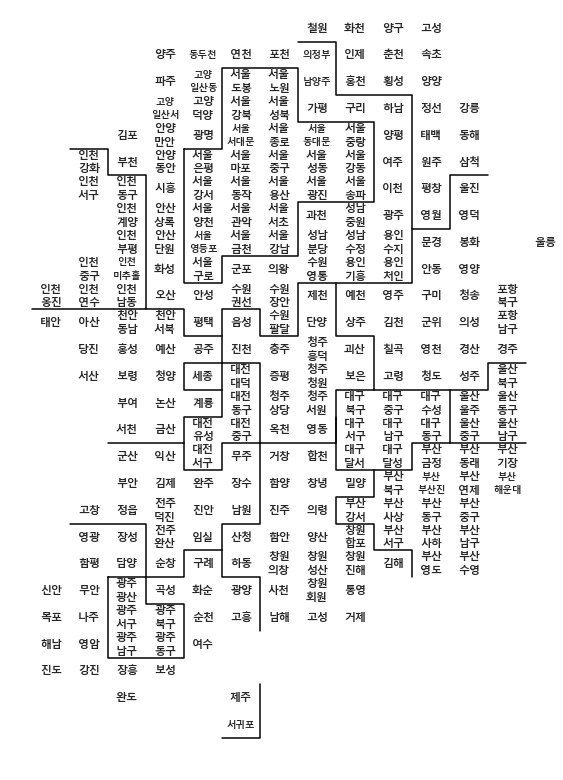

In [22]:
plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시
    # (중구, 서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2
    
    plt.annotate(dispname, (row['x'] + 0.5, row['y'] + 0.5), weight = 'bold',
                 fontsize = fontsize, ha = 'center', va = 'center', 
                 linespacing = linespacing)

# 시도 경계를 그림
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()

plt.axis('off')

plt.tight_layout()
plt.show()

In [23]:
tmp_list = list(set(cof['ID'].unique()) - set(draw_korea['ID'].unique()))

for tmp in tmp_list:
    cof = cof.drop(cof[cof['ID']==tmp].index)

print(set(cof['ID'].unique()) - set(draw_korea['ID'].unique()))
set()

set()


set()

In [24]:
cof = pd.merge(cof, draw_korea, how='right', on=['ID'])

cof.head()

,시도명,시군구명,점포수빽다방,점포수스타벅스,점포수이디야,점포수커피빈,ID,y,x
0,강원도,강릉시,2.0,5.0,15.0,0.0,강릉,3,11
1,강원도,고성군,0.0,2.0,1.0,0.0,고성(강원),0,10
2,강원도,동해시,1.0,1.0,1.0,1.0,동해,4,11
3,강원도,삼척시,2.0,1.0,1.0,0.0,삼척,5,11
4,강원도,속초시,0.0,4.0,8.0,0.0,속초,1,10


In [25]:
# fillna로 없는 데이터 채우기
cof = cof.fillna(0)
cof

,시도명,시군구명,점포수빽다방,점포수스타벅스,점포수이디야,점포수커피빈,ID,y,x
0,강원도,강릉시,2.0,5.0,15.0,0.0,강릉,3,11
1,강원도,고성군,0.0,2.0,1.0,0.0,고성(강원),0,10
2,강원도,동해시,1.0,1.0,1.0,1.0,동해,4,11
3,강원도,삼척시,2.0,1.0,1.0,0.0,삼척,5,11
4,강원도,속초시,0.0,4.0,8.0,0.0,속초,1,10
...,...,...,...,...,...,...,...,...,...
245,0,0,0.0,0.0,0.0,0.0,구례,20,4
246,0,0,0.0,0.0,0.0,0.0,신안,21,0
247,0,0,0.0,0.0,0.0,0.0,화순,21,4
248,0,0,0.0,0.0,0.0,0.0,장흥,24,2


In [26]:
# 커피지수 만들기 (분모가 0인것들은 제외하기)
coffee_list = []

for i in cof.index:
    if cof['점포수빽다방'][i]+cof['점포수이디야'][i] == 0:
        coffee_list.append(0)
    else:
        coffee_list.append((cof['점포수스타벅스'][i] + cof['점포수커피빈'][i]) / (cof['점포수빽다방'][i] + cof['점포수이디야'][i]))

print(coffee_list)

[0.29411764705882354, 2.0, 1.0, 0.3333333333333333, 0.5, 0.0, 0.0, 0.6875, 0.3333333333333333, 0.0, 0.0, 0.3548387096774194, 1.0, 1.0, 0.5, 0.0, 0.0, 0.0, 0.8076923076923077, 1.2352941176470589, 1.6153846153846154, 2.0, 0.9166666666666666, 0.2777777777777778, 0.25, 0.35294117647058826, 0.5333333333333333, 0.2653061224489796, 1.3333333333333333, 0.3333333333333333, 1.8571428571428572, 0.3333333333333333, 0.3333333333333333, 0.5625, 0.6086956521739131, 0.6, 0.9411764705882353, 0.37037037037037035, 0.11538461538461539, 0.08333333333333333, 1.0, 0.8888888888888888, 0.35714285714285715, 0.4666666666666667, 0.5, 0.6, 2.0, 0.6, 0.5555555555555556, 0.5454545454545454, 0.5555555555555556, 0.14285714285714285, 0.4444444444444444, 1.375, 0.2962962962962963, 0.5789473684210527, 0.4166666666666667, 0.55, 0.6486486486486487, 0.7142857142857143, 0.0, 0.0, 0.41379310344827586, 0.0, 0.6, 0.5, 1.0, 0.375, 0.3333333333333333, 0.25, 0.375, 1.3333333333333333, 0.8461538461538461, 0.5, 0.375, 0.75, 0, 2.0, 

In [27]:
cof['커피지수'] = coffee_list
cof.head()

,시도명,시군구명,점포수빽다방,점포수스타벅스,점포수이디야,점포수커피빈,ID,y,x,커피지수
0,강원도,강릉시,2.0,5.0,15.0,0.0,강릉,3,11,0.294118
1,강원도,고성군,0.0,2.0,1.0,0.0,고성(강원),0,10,2.000000
2,강원도,동해시,1.0,1.0,1.0,1.0,동해,4,11,1.000000
3,강원도,삼척시,2.0,1.0,1.0,0.0,삼척,5,11,0.333333
4,강원도,속초시,0.0,4.0,8.0,0.0,속초,1,10,0.500000


In [28]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData])-
                     min(blockedMap[targetData]))*0.25+min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

    plt.figure(figsize=(9,11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    #지역이름표시
    for idx, row in blockedMap.iterrows():
        if len(row.ID.split()) == 2:
            dispname = f'{row.ID.split()[0]} \n {row.ID.split()[1]}'
        elif row.ID[:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 3글자 이상인곳 작은 글자로 표시
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1
        
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold', 
                    fontsize=fontsize, ha='center', va='center', color=annocolor, linespacing=linespacing)

    # 시도 경계 그리기
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

### 전국 커피지수 비교

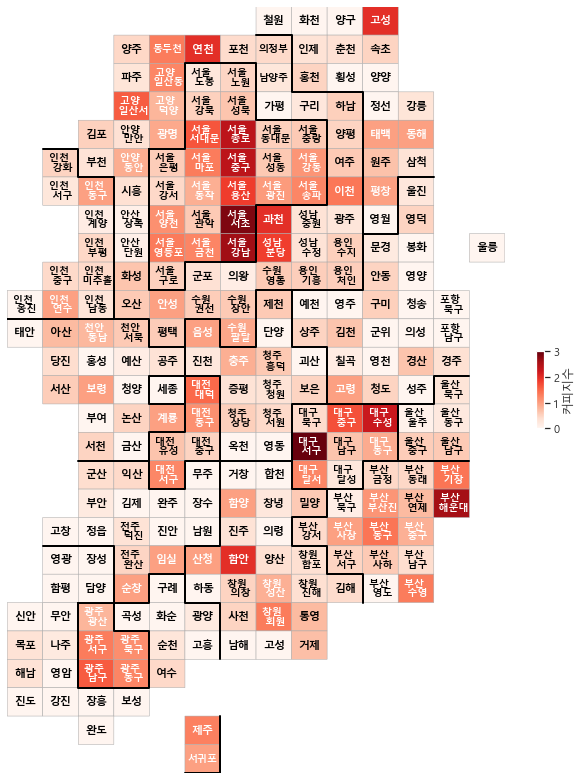

In [29]:
drawKorea('커피지수', cof, 'Reds')

In [30]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [31]:
cof_folium = cof.set_index('ID')
cof_folium.head()

,시도명,시군구명,점포수빽다방,점포수스타벅스,점포수이디야,점포수커피빈,y,x,커피지수
ID,,,,,,,,,
강릉,강원도,강릉시,2.0,5.0,15.0,0.0,3,11,0.294118
고성(강원),강원도,고성군,0.0,2.0,1.0,0.0,0,10,2.000000
동해,강원도,동해시,1.0,1.0,1.0,1.0,4,11,1.000000
삼척,강원도,삼척시,2.0,1.0,1.0,0.0,5,11,0.333333
속초,강원도,속초시,0.0,4.0,8.0,0.0,1,10,0.500000


In [32]:
cof_folium['커피지수'] = cof_folium['커피지수'].astype(float)
cof_folium['커피지수'] = cof_folium['커피지수']
cof_folium.head()

,시도명,시군구명,점포수빽다방,점포수스타벅스,점포수이디야,점포수커피빈,y,x,커피지수
ID,,,,,,,,,
강릉,강원도,강릉시,2.0,5.0,15.0,0.0,3,11,0.294118
고성(강원),강원도,고성군,0.0,2.0,1.0,0.0,0,10,2.000000
동해,강원도,동해시,1.0,1.0,1.0,1.0,4,11,1.000000
삼척,강원도,삼척시,2.0,1.0,1.0,0.0,5,11,0.333333
속초,강원도,속초시,0.0,4.0,8.0,0.0,1,10,0.500000


In [33]:
geo_path = './data/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_data,  
               data = cof_folium['커피지수'],
               columns= [cof_folium.index, cof_folium['커피지수']],
               fill_color= 'Pastel2',
               key_on='feature.id')
map